In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\bruno\Bureau RMC Dropbox\Bruno  Hermans\netlogo\final base-table.csv", skiprows = 6)

df = df.drop(['percentage-female', 'percentage-stationary-staff', 
              'percentage-children', 'alarm?',  
              'verbose?', 'debug?', 'average-response-time',
             '[step]'],1)
changes = {'precision ((count visitors with [evacuating? = false] / count visitors) * 100) 2': 'percentage_evacuating',
           '[run number]': 'run_number'}

# Renaming relevant column
df = df.rename(columns = changes)
df.head()

,run_number,max-turtles-per-patch,agents-at-start,percentage-visitors-go-to-main-door,alerting-range,evacuation-duration,event-duration,people-in-building,staff-members-in-building,visitors-in-building,percentage_evacuating
0,2,1,450,0,6,0,0,450,50,400,100
1,2,1,450,0,6,0,1,450,50,400,100
2,2,1,450,0,6,0,2,450,50,400,100
3,2,1,450,0,6,0,3,450,50,400,100
4,2,1,450,0,6,0,4,450,50,400,100


In [3]:
runs = df.groupby(['run_number']).max()
runs.head()

,max-turtles-per-patch,agents-at-start,percentage-visitors-go-to-main-door,alerting-range,evacuation-duration,event-duration,people-in-building,staff-members-in-building,visitors-in-building,percentage_evacuating
run_number,,,,,,,,,,
1,1,450,0,6,320,350,450,50,400,98.25
2,1,450,0,6,316,346,450,50,400,97.24
3,1,450,0,6,298,328,450,50,400,98.99
4,1,450,0,6,325,355,450,50,400,99.24
5,1,450,0,6,347,377,450,50,400,98.25


In [4]:
avg = runs.groupby(['percentage-visitors-go-to-main-door']).mean()
avg

,max-turtles-per-patch,agents-at-start,alerting-range,evacuation-duration,event-duration,people-in-building,staff-members-in-building,visitors-in-building
percentage-visitors-go-to-main-door,,,,,,,,
0,1.0,450.0,6.0,344.23,374.23,450.0,50.0,400.0
10,1.0,450.0,6.0,348.39,378.39,450.0,50.0,400.0
20,1.0,450.0,6.0,339.33,369.33,450.0,50.0,400.0
30,1.0,450.0,6.0,344.17,374.17,450.0,50.0,400.0
40,1.0,450.0,6.0,346.55,376.55,450.0,50.0,400.0
50,1.0,450.0,6.0,348.61,378.61,450.0,50.0,400.0
60,1.0,450.0,6.0,352.46,382.46,450.0,50.0,400.0
70,1.0,450.0,6.0,362.24,392.24,450.0,50.0,400.0
80,1.0,450.0,6.0,359.13,389.13,450.0,50.0,400.0


Text(0, 0.5, 'Evacuation time')

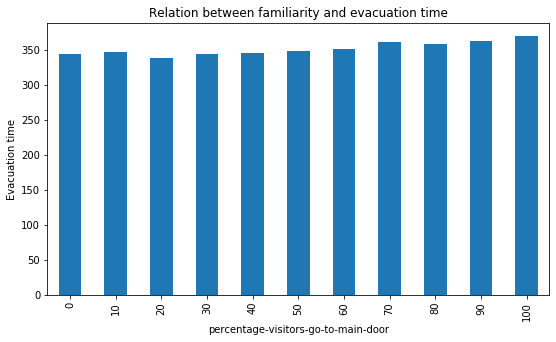

In [13]:
fig, ax = plt.subplots(figsize = (9,5))
avg['evacuation-duration'].plot.bar(ax= ax)
ax.set_title('Relation between familiarity and evacuation time')
ax.set_ylabel('Evacuation time')